<a href="https://colab.research.google.com/github/Danddt/Russian_Opinion_Polls/blob/main/levada_montly_stats_January2023.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
! pip uninstall googletrans
! pip install googletrans==3.1.0a0

# January 2023 Poll Results 

In [ ]:
import os
import pandas as pd
import numpy as np

dfs = []
for file in os.listdir('/content/drive/MyDrive/RUSSdata/Levada/2023-02-02'):
  name = '/content/drive/MyDrive/RUSSdata/Levada/2023-02-02/'+file
  df_l = pd.read_csv(name)
  df_l['survey_name'] = file
  df_l['date'] = pd.to_datetime(df_l['date'].str.strip(), format='%Y-%m')
  dfs.append(df_l)


In [ ]:
approval_gov = dfs[-1][['date', 'Approve']]
approval_president = dfs[0][['date', 'Approve']]


In [ ]:
filt1 = '2015-02'

In [ ]:
## 2022 Invasion of Ukraine
pres_feb_on = approval_president[approval_president['date']>'2022'].set_index('date').rename(columns={'Approve': 
                                                                                                      'President Approval'})
gov_feb_on = approval_gov[approval_gov['date']>'2022'].set_index('date').rename(columns={'Approve': 
                                                                                         'Government Approval'})
## 2014 Invasion of Ukraine
first_pres_feb_on = approval_president[(approval_president['date']>'2014') & (approval_president['date']<filt1)].set_index('date').rename(columns={'Approve': 'President Approval'})
first_gov_feb_on = approval_gov[(approval_gov['date']>'2014') & (approval_gov['date']<filt1)].set_index('date').rename(columns={'Approve': 'Government Approval'})


In [ ]:
listo1 = [first_pres_feb_on,first_gov_feb_on]
first_political_asses = pd.concat(listo1, axis =1).reset_index()
#first_political_asses.to_csv('/content/drive/MyDrive/movie_russia/November_2022/data_feb_nov_2014.csv', index=False)
display(first_political_asses)

,date,President Approval,Government Approval
0,2014-02-01,69.0,47.0
1,2014-03-01,80.0,58.0
2,2014-04-01,82.0,56.0
3,2014-05-01,83.0,60.0
4,2014-06-01,86.0,60.0
5,2014-07-01,85.0,60.0
6,2014-08-01,84.0,62.0
7,2014-09-01,86.0,66.0
8,2014-10-01,88.0,64.0
9,2014-11-01,85.0,59.0


In [ ]:
listo2 = [pres_feb_on,gov_feb_on]
political_asses = pd.concat(listo2, axis =1).reset_index()

#political_asses.to_csv('/content/drive/MyDrive/movie_russia/November_2022/data_feb_nov_2022.csv', index=False)
display(political_asses)

,date,President Approval,Government Approval
0,2022-02-01,71.0,55.0
1,2022-03-01,83.0,70.0
2,2022-04-01,82.0,68.0
3,2022-05-01,83.0,70.0
4,2022-06-01,83.0,70.0
5,2022-07-01,83.0,71.0
6,2022-08-01,83.0,68.0
7,2022-09-01,77.0,63.0
8,2022-10-01,79.0,66.0
9,2022-11-01,79.0,65.0


In [ ]:
political_asses['President Approval'].max()

83.0

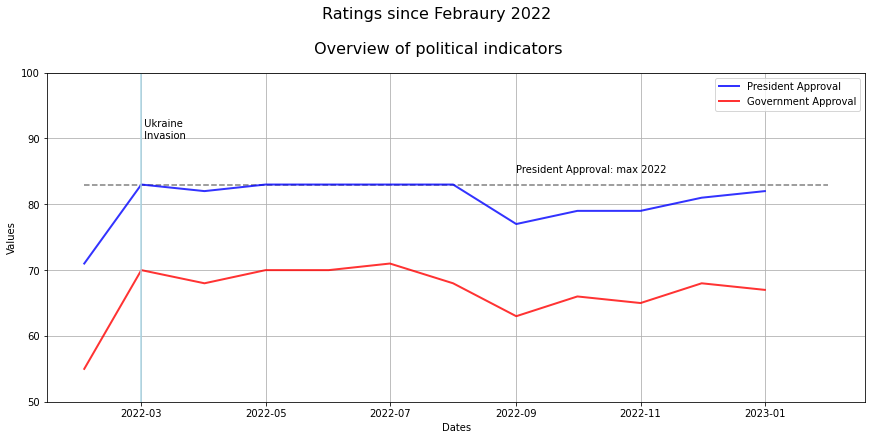

In [ ]:
import matplotlib.pyplot as plt



fig, ax = plt.subplots(figsize=(12, 6), constrained_layout=True,)


plt.ylim(50,100, 5)


ax.plot(political_asses.date,political_asses['President Approval'], linewidth=2,alpha=0.8, color='blue' )
ax.plot(political_asses.date,political_asses['Government Approval'], linewidth=2,alpha=0.8, color='red' )

ax.axvline(pd.Timestamp('2022-03'),color='lightblue',linestyle='solid', alpha=1)
ax.text(x=pd.Timestamp('2022-03'), y=90, s=' Ukraine\n Invasion', color='black')

ax.hlines(y=83, xmin=pd.Timestamp('2022-02-01'), 
          xmax=pd.Timestamp('2023-02-01'),linestyle='dashed', alpha=1, color = 'gray')
ax.text(x=pd.Timestamp('2022-09-01'), y=83, s='President Approval: max 2022\n', color='black')

plt.xlabel('Dates')
plt.ylabel('Values')

ax.legend(['President Approval','Government Approval'], loc='upper right')
plt.grid()

fig.suptitle('Ratings since Febraury 2022\n\n Overview of political indicators', fontsize=16)

plt.savefig('/content/drive/MyDrive/movie_russia/January/president_government.jpg',  bbox_inches='tight')

In [ ]:
first_political_asses.loc[first_political_asses['President Approval'].idxmax()]

date                   2014-10-01 00:00:00
President Approval                    88.0
Government Approval                   64.0
Name: 8, dtype: object

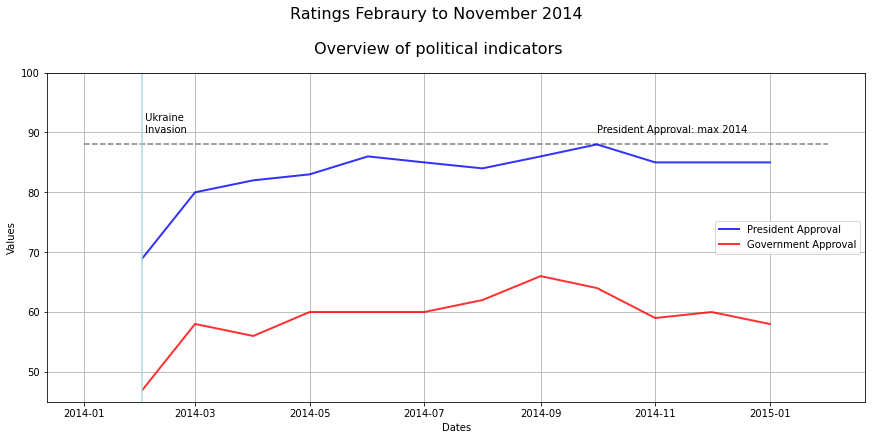

In [ ]:
import matplotlib.pyplot as plt



fig, ax = plt.subplots(figsize=(12, 6), constrained_layout=True,)


plt.ylim(45,100, 5)


ax.plot(first_political_asses.date,first_political_asses['President Approval'], linewidth=2,alpha=0.8, color='blue' )
ax.plot(first_political_asses.date,first_political_asses['Government Approval'], linewidth=2,alpha=0.8, color='red' )



ax.axvline(pd.Timestamp('2014-02'),color='lightblue',linestyle='solid', alpha=1)
ax.text(x=pd.Timestamp('2014-02'), y=90, s=' Ukraine\n Invasion', color='black')

ax.hlines(y=88, xmin=pd.Timestamp('2014-01-01'), 
          xmax=pd.Timestamp('2015-02-01'),linestyle='dashed', alpha=1, color = 'gray')
ax.text(x=pd.Timestamp('2014-10-01'), y=88, s='President Approval: max 2014\n', color='black')

plt.xlabel('Dates')
plt.ylabel('Values')

ax.legend(['President Approval','Government Approval'], loc='center right')

plt.grid()
fig.suptitle('Ratings Febraury to November 2014\n\n Overview of political indicators', fontsize=16)

plt.savefig('/content/drive/MyDrive/movie_russia/January/president_government_2014.jpg', bbox_inches='tight')

In [ ]:
date_ind_one=first_political_asses.reset_index()
date_ind_two = political_asses.reset_index()


<ipython-input-142-049ea4c8cb1a>:21: UserWarning: You have used the `textcoords` kwarg, but not the `xytext` kwarg.  This can lead to surprising results.
  ax.annotate(r, xy=(d, l),textcoords="offset points",
<ipython-input-142-049ea4c8cb1a>:25: UserWarning: You have used the `textcoords` kwarg, but not the `xytext` kwarg.  This can lead to surprising results.
  ax.annotate(r, xy=(d, l), textcoords="offset points",


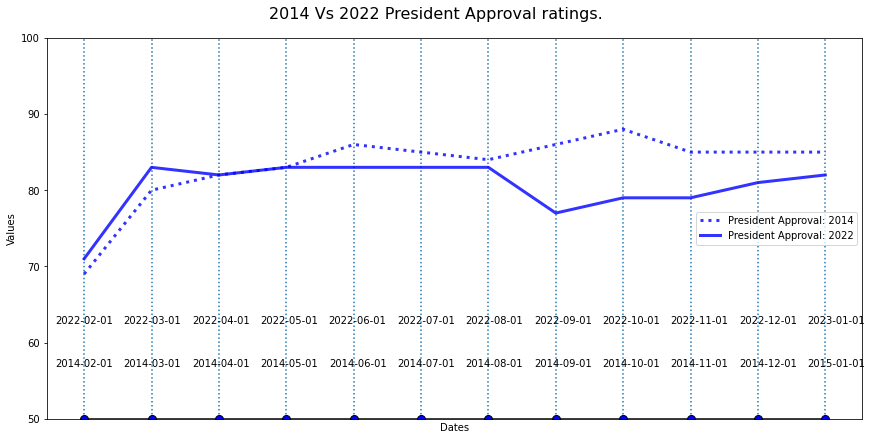

In [ ]:
# Combined
import matplotlib.pyplot as plt

fig, ax = plt.subplots(figsize=(12, 6), constrained_layout=True,)

plt.ylim(50,100, 5)

ax.plot(date_ind_one['index'],first_political_asses['President Approval'],linewidth=3,linestyle = 'dotted',alpha=0.8, color='blue' )
ax.plot(date_ind_one['index'],political_asses['President Approval'],linewidth=3, alpha=0.8, color='blue' )

levels = [50]*12
levelo = [55]*12

ax.vlines(date_ind_one['index'], 0, 100, color="tab:blue", linestyle = 'dotted')
ax.plot(date_ind_one['index'], np.ones_like(date_ind_one['index'])*50, "-o",
        color="k", markerfacecolor="blue", markersize=8)  # Baseline and markers on it.

plt.xticks([])

for d, l,r in zip(date_ind_one['index'],levels ,date_ind_one['date'].astype(str)):
      ax.annotate(r, xy=(d, l),textcoords="offset points",
                horizontalalignment="center",
                verticalalignment="bottom", wrap=True)
for d, l,r in zip(date_ind_one['index'],levelo ,date_ind_two['date'].astype(str)):
      ax.annotate(r, xy=(d, l), textcoords="offset points",
                horizontalalignment="center",
                verticalalignment="bottom", wrap=True)
      
plt.xlabel('Dates')
plt.ylabel('Values')

ax.legend(['President Approval: 2014','President Approval: 2022', ], loc='center right')

fig.suptitle('2014 Vs 2022 President Approval ratings.', fontsize=16)
plt.savefig('/content/drive/MyDrive/movie_russia/January/president_2023_2014.jpg', bbox_inches='tight')

<ipython-input-143-38fb7f8c43e0>:21: UserWarning: You have used the `textcoords` kwarg, but not the `xytext` kwarg.  This can lead to surprising results.
  ax.annotate(r, xy=(d, l),textcoords="offset points",
<ipython-input-143-38fb7f8c43e0>:25: UserWarning: You have used the `textcoords` kwarg, but not the `xytext` kwarg.  This can lead to surprising results.
  ax.annotate(r, xy=(d, l), textcoords="offset points",


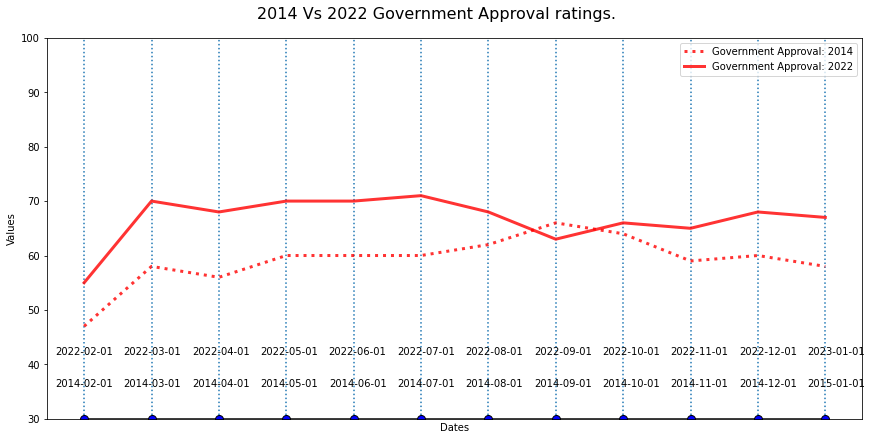

In [ ]:
# Combined
import matplotlib.pyplot as plt

fig, ax = plt.subplots(figsize=(12, 6), constrained_layout=True,)

plt.ylim(30,100, 5)

ax.plot(date_ind_one['index'],first_political_asses['Government Approval'],linewidth=3,linestyle = 'dotted',alpha=0.8, color='red' )
ax.plot(date_ind_one['index'],political_asses['Government Approval'],linewidth=3,alpha=0.8,  color='red' )

levels = [30]*12
levelo = [35]*12

ax.vlines(date_ind_one['index'], 0, 100, color="tab:blue", linestyle = 'dotted')
ax.plot(date_ind_one['index'], np.ones_like(date_ind_one['index'])*30, "-o",
        color="k", markerfacecolor="blue", markersize=8)  # Baseline and markers on it.

plt.xticks([])

for d, l,r in zip(date_ind_one['index'],levels ,date_ind_one['date'].astype(str)):
      ax.annotate(r, xy=(d, l),textcoords="offset points",
                horizontalalignment="center",
                verticalalignment="bottom", wrap=True)
for d, l,r in zip(date_ind_one['index'],levelo ,date_ind_two['date'].astype(str)):
      ax.annotate(r, xy=(d, l), textcoords="offset points",
                horizontalalignment="center",
                verticalalignment="bottom", wrap=True)
      
plt.xlabel('Dates')
plt.ylabel('Values')

ax.legend(['Government Approval: 2014','Government Approval: 2022', ], loc='upper right')

fig.suptitle('2014 Vs 2022 Government Approval ratings.', fontsize=16)
plt.savefig('/content/drive/MyDrive/movie_russia/January/government_2023_2014.jpg', bbox_inches='tight')

In [ ]:
import requests
import pandas as pd
from bs4 import BeautifulSoup


add_indicators ='https://www.levada.ru/2023/02/01/odobrenie-institutov-rejtingi-politikov-i-partij-yanvar-2023-goda/'
response= requests.get(add_indicators).content
df_list = pd.read_html(response)

Respinses to the question:
Are things going in the country today as a whole in the right direction, or is the country moving in the wrong direction?

0 	В правильном направлении : 'Right direction'

1 	По неверному пути:'Wrong Direction'

2 	Затруднились ответить:'Cannot say' /Difficult to answer

3 	Метод опроса: Methodology

In [ ]:
asses_direction = df_list[1].T.iloc[:, :-1]
country_cols =[ 'Date', 'Right direction', 'Wrong Direction', 'Cannot say']
asses_direction.columns = country_cols
asses_direction.to_csv('/content/drive/MyDrive/RUSSdata/Levada/OverallRes2022_23ADDonIndicators/country_going_right_direction.csv', index=False)

In [ ]:
comp_pres=approval_president[approval_president['date']>'2019-12']
comp_gov=approval_gov [approval_gov['date']>'2019-12']

In [ ]:
comp_gov.tail()

,date,Approve
262,2022-09-01,63.0
263,2022-10-01,66.0
264,2022-11-01,65.0
265,2022-12-01,68.0
266,2023-01-01,67.0


In [ ]:
asses_direction = pd.read_csv('/content/drive/MyDrive/RUSSdata/Levada/OverallRes2022_23ADDonIndicators/country_going_right_direction.csv')
asses_direction.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 311 entries, 0 to 310
Data columns (total 4 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Date             311 non-null    float64
 1   Right direction  311 non-null    int64  
 2   Wrong Direction  311 non-null    int64  
 3   Cannot say       311 non-null    int64  
dtypes: float64(1), int64(3)
memory usage: 9.8 KB


In [ ]:
asses_direction['Date'] = asses_direction['Date'].apply(lambda x: "{:.4f}".format(x))
asses_direction['Date']=(asses_direction['Date'].str.split('.')).apply(lambda x: list(reversed(x))) #reverse to get Year Month (currently Month Year)
asses_direction['Date']=asses_direction['Date'].apply('-'.join)

In [ ]:
asses_direction['Date']=pd.to_datetime(asses_direction['Date'].str.strip(), format='%Y-%m')

In [ ]:
asses_direction_2020 = asses_direction[asses_direction['Date']>'2019-12']

In [ ]:
asses_direction_2020.tail()

,Date,Right direction,Wrong Direction,Cannot say
306,2022-09-01,60,27,12
307,2022-10-01,64,24,12
308,2022-11-01,61,27,12
309,2022-12-01,63,24,13
310,2023-01-01,66,24,10


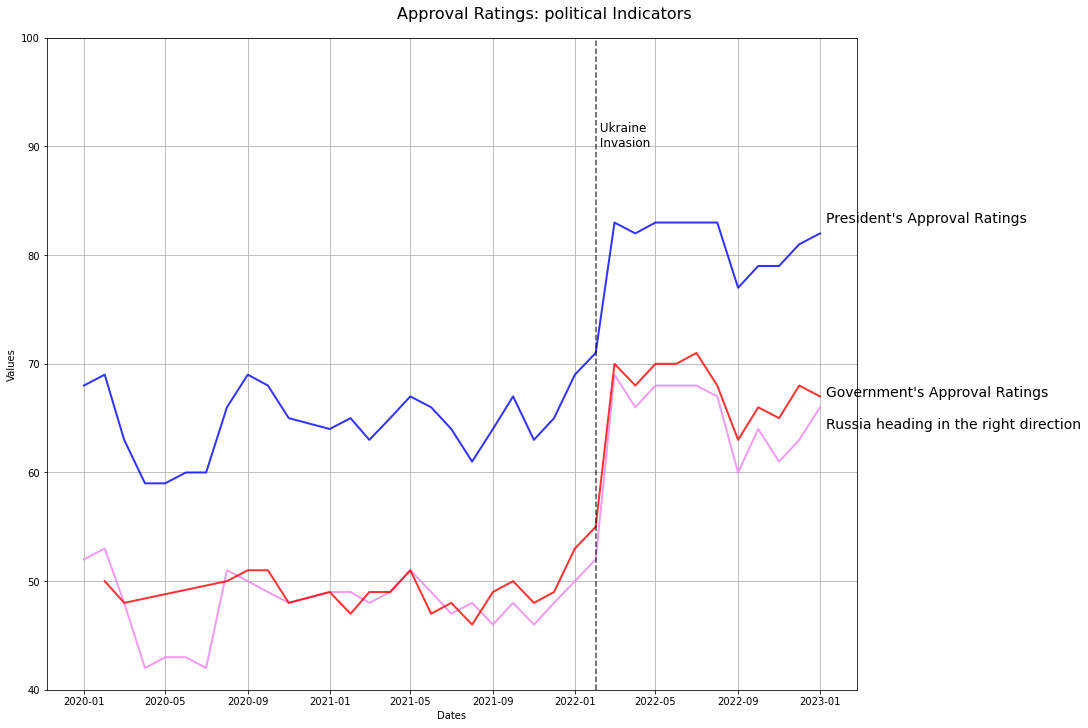

In [ ]:
import matplotlib.pyplot as plt

fig, ax = plt.subplots(figsize=(15,10), constrained_layout=True,)

plt.ylim(40,100, 5)


ax.plot(asses_direction_2020.Date,asses_direction_2020['Right direction'], linewidth=2,alpha=0.8, color='violet' )
ax.plot(comp_pres['date'], comp_pres.Approve,linewidth=2,alpha=0.8, color='blue' )
ax.plot(comp_gov['date'],comp_gov.Approve,linewidth=2,alpha=0.8, color='red' )

plt.axvline(pd.Timestamp('2022-02'),color='black',linestyle='dashed', alpha=.7)
plt.text(x=pd.Timestamp('2022-02'), y=90, s=' Ukraine\n Invasion', color='black', fontsize=12)

plt.text(x=pd.Timestamp('2023-01-10'), y=83, s='President\'s Approval Ratings', color='black', fontsize = 14)
plt.text(x=pd.Timestamp('2023-01-10'), y=67, s='Government\'s Approval Ratings', color='black', fontsize = 14)
plt.text(x=pd.Timestamp('2023-01-10'), y=64, s='Russia heading in the right direction', color='black', fontsize = 14)

plt.xlabel('Dates')
plt.ylabel('Values')


plt.grid()
fig.suptitle('Approval Ratings: political Indicators', fontsize=16)

plt.savefig('/content/drive/MyDrive/movie_russia/January/politicalparameters_since2022.jpg', bbox_inches='tight')


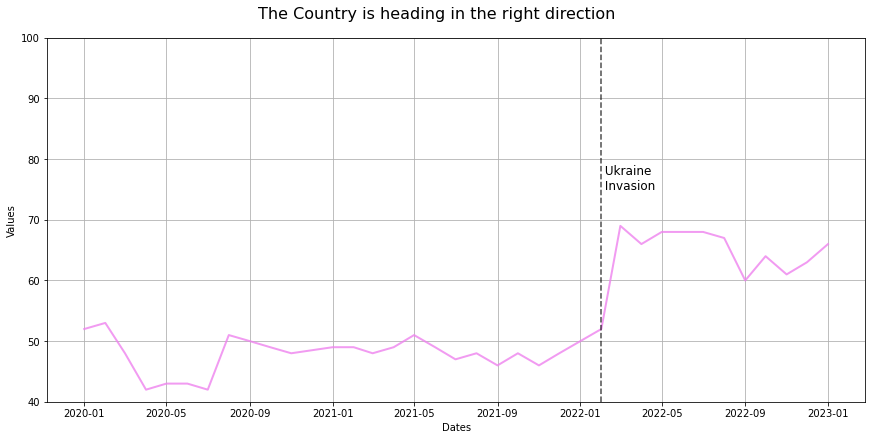

In [ ]:
import matplotlib.pyplot as plt

fig, ax = plt.subplots(figsize=(12, 6), constrained_layout=True,)

plt.ylim(40,100, 5)


ax.plot(asses_direction_2020.Date,asses_direction_2020['Right direction'], linewidth=2,alpha=0.8, color='violet' )

plt.axvline(pd.Timestamp('2022-02'),color='black',linestyle='dashed', alpha=.7)
plt.text(x=pd.Timestamp('2022-02'), y=75, s=' Ukraine\n Invasion', color='black', fontsize=12)

plt.xlabel('Dates')
plt.ylabel('Values')


plt.grid()
fig.suptitle('The Country is heading in the right direction', fontsize=16)

plt.savefig('/content/drive/MyDrive/movie_russia/January/country_hading_right.jpg', bbox_inches='tight')

In [ ]:
column_parties = df_list[-1][0].to_list()
parties_support =df_list[-1].T.iloc[1:, :]
parties_support.columns =column_parties 


In terms of the party’s choice, the rating of “ United Russia ” in November was 54%, support for the Communist Party — 13%. The electoral ratings of LDPR, SRZP and “ New People ” were 12%, 7% and 5%, respectively.
source :https://www.levada.ru/2023/02/01/odobrenie-institutov-rejtingi-politikov-i-partij-yanvar-2023-goda/

In [ ]:
party_support = df_list[-1]
party_support =party_support.fillna('партия')
cols_party = party_support.loc[0].to_list()
parties = party_support.iloc[1:, :]
parties.columns= cols_party
parties

,партия,авг.16,дек.17,авг.18,июл.19,дек.19,фев.20,авг.20,ноя.20,фев.21,...,ноя.21,дек.21,фев.22,мар.22,апр.22,май.22,июн.22,сен.22,ноя.22,янв.23
1,Всероссийская политическая партия «Единая Россия»,50,58,44,44,47,45,45,43,42,...,41,40,44,54,54,53,53,52,53,54
2,Коммунистическая партия Российской Федерации (...,15,14,15,17,14,13,9,11,15,...,21,22,19,15,14,16,16,16,16,13
3,Либерально-демократическая партия России (ЛДПР),14,15,17,16,13,16,16,17,19,...,13,12,11,13,11,10,12,13,12,12
4,Политическая партия «Справедливая Россия – За ...,9,4,5,4,5,5,5,7,7,...,6,8,8,6,5,5,5,6,6,7
5,Политическая партия «Новые люди»,—,—,—,—,—,—,—,—,—,...,8,8,5,5,7,5,5,4,5,5


In [ ]:
from googletrans import Translator
translator = Translator()

parties['Political Parties'] = parties['партия'].apply(lambda x: translator.translate(x, dest='en').text)

<ipython-input-130-cf6846fb9b74>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  parties['Political Parties'] = parties['партия'].apply(lambda x: translator.translate(x, dest='en').text)


In [ ]:
parti_1 =parties.iloc[:, 1:].set_index('Political Parties').T.reset_index()
parti_1['month']=parti_1['index'].str[:3]
parti_1['year']='20'+ parti_1['index'].str[-2:]
parti_1.head()

Political Parties,index,"All-Russian political party ""United Russia""",Communist Party of the Russian Federation (KPRF),Liberal Democratic Party of Russia (LDPR),"Political party ""A Just Russia - For Truth""*","Political party ""New people""",month,year
0,авг.16,50,15,14,9,—,авг,2016
1,дек.17,58,14,15,4,—,дек,2017
2,авг.18,44,15,17,5,—,авг,2018
3,июл.19,44,17,16,4,—,июл,2019
4,дек.19,47,14,13,5,—,дек,2019


In [ ]:
month_rus = list(parti_1['month'].unique())
month_en = ['August', 'December', 'July', 'February', 'November', 'June', 'October', 'March', 'April', 'May', 'September', 'January']

month_translate = dict(zip(month_rus, month_en))

In [ ]:
listo=[]
for item in parti_1['month']:
  listo.append(month_translate.get(item))
parti_1['month_en']=listo

parti_1.head()

Political Parties,index,"All-Russian political party ""United Russia""",Communist Party of the Russian Federation (KPRF),Liberal Democratic Party of Russia (LDPR),"Political party ""A Just Russia - For Truth""*","Political party ""New people""",month,year,month_en
0,авг.16,50,15,14,9,—,авг,2016,August
1,дек.17,58,14,15,4,—,дек,2017,December
2,авг.18,44,15,17,5,—,авг,2018,August
3,июл.19,44,17,16,4,—,июл,2019,July
4,дек.19,47,14,13,5,—,дек,2019,December


In [ ]:
parti_1.insert(0, 'Date', (pd.to_datetime((parti_1['month_en']+'-'+parti_1['year']))))
parti_1.drop(columns=['index','month' ,	'year' ,	'month_en'], inplace=True)

parti_1.head()

Political Parties,Date,"All-Russian political party ""United Russia""",Communist Party of the Russian Federation (KPRF),Liberal Democratic Party of Russia (LDPR),"Political party ""A Just Russia - For Truth""*","Political party ""New people"""
0,2016-08-01,50,15,14,9,—
1,2017-12-01,58,14,15,4,—
2,2018-08-01,44,15,17,5,—
3,2019-07-01,44,17,16,4,—
4,2019-12-01,47,14,13,5,—


In [ ]:
parti_1.to_csv('/content/drive/MyDrive/RUSSdata/Levada/OverallRes2022_23ADDonIndicators/parties_support.csv', index=False)

In [ ]:
parti_1 = pd.read_csv('/content/drive/MyDrive/RUSSdata/Levada/OverallRes2022_23ADDonIndicators/parties_support.csv')

In [ ]:
parti_1['Date'] = pd.to_datetime(parti_1['Date'])

In [ ]:
parti_1 = parti_1.replace('—', 0)

In [ ]:
pos_list = parti_1.loc[21][1:].to_list()

In [ ]:
party_name_ls= parti_1.columns[1:]
party_name_ls

Index(['All-Russian political party "United Russia"',
       'Communist Party of the Russian Federation (KPRF)',
       'Liberal Democratic Party of Russia (LDPR)',
       'Political party "A Just Russia - For Truth"*',
       'Political party "New people"'],
      dtype='object')

In [ ]:
# Changed value for ease of rading on graph
pos_list[2]=11
pos_list

[54, 13, 11, 7, 5]

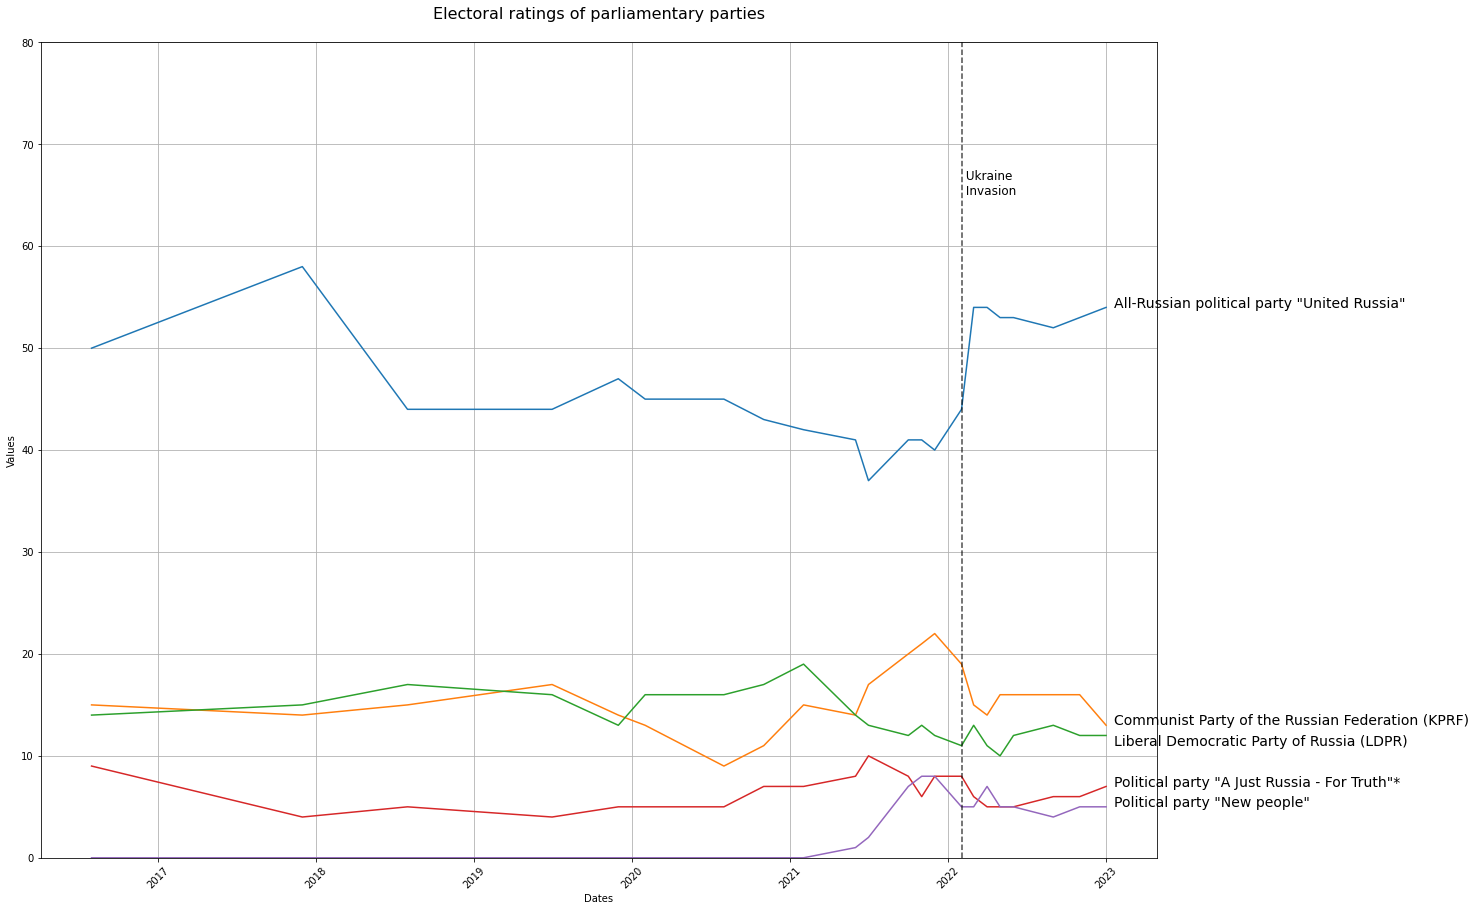

In [ ]:
import matplotlib.pyplot as plt


plt.figure(figsize=(20, 15))

plt.ylim(0, 80)

plt.plot(parti_1.Date,parti_1[parti_1.columns[1:]])
plt.xticks(rotation = 45)

plt.axvline(pd.Timestamp('2022-02'),color='black',linestyle='dashed', alpha=.7)
plt.text(x=pd.Timestamp('2022-02'), y=65, s=' Ukraine\n Invasion', color='black', fontsize=12)

for item in range(len(pos_list)):
  plt.text(x=pd.Timestamp('2023-01-20'), y=pos_list[item], s=party_name_ls[item], color='black', fontsize = 14)

plt.xlabel('Dates')
plt.ylabel('Values')

plt.grid()

plt.title('Electoral ratings of parliamentary parties\n', fontsize=16)
plt.savefig('/content/drive/MyDrive/movie_russia/January/parties_only.jpg', bbox_inches='tight')

In [ ]:
short_parti_1 = parti_1.reset_index()
short_parti_1.head

,Date,"All-Russian political party ""United Russia""",Communist Party of the Russian Federation (KPRF),Liberal Democratic Party of Russia (LDPR),"Political party ""A Just Russia - For Truth""*","Political party ""New people"""
0,2016-08-01,50,15,14,9,0
1,2017-12-01,58,14,15,4,0
2,2018-08-01,44,15,17,5,0
3,2019-07-01,44,17,16,4,0
4,2019-12-01,47,14,13,5,0


In [ ]:
short_parti_1['Date'] = pd.to_datetime(short_parti_1['Date'])


In [ ]:
short_part_cl= short_parti_1[short_parti_1['Date']>'2019-12']

In [ ]:
short_part_cl.tail()

,Date,"All-Russian political party ""United Russia""",Communist Party of the Russian Federation (KPRF),Liberal Democratic Party of Russia (LDPR),"Political party ""A Just Russia - For Truth""*","Political party ""New people"""
17,2022-05-01,53,16,10,5,5
18,2022-06-01,53,16,12,5,5
19,2022-09-01,52,16,13,6,4
20,2022-11-01,53,16,12,6,5
21,2023-01-01,54,13,12,7,5


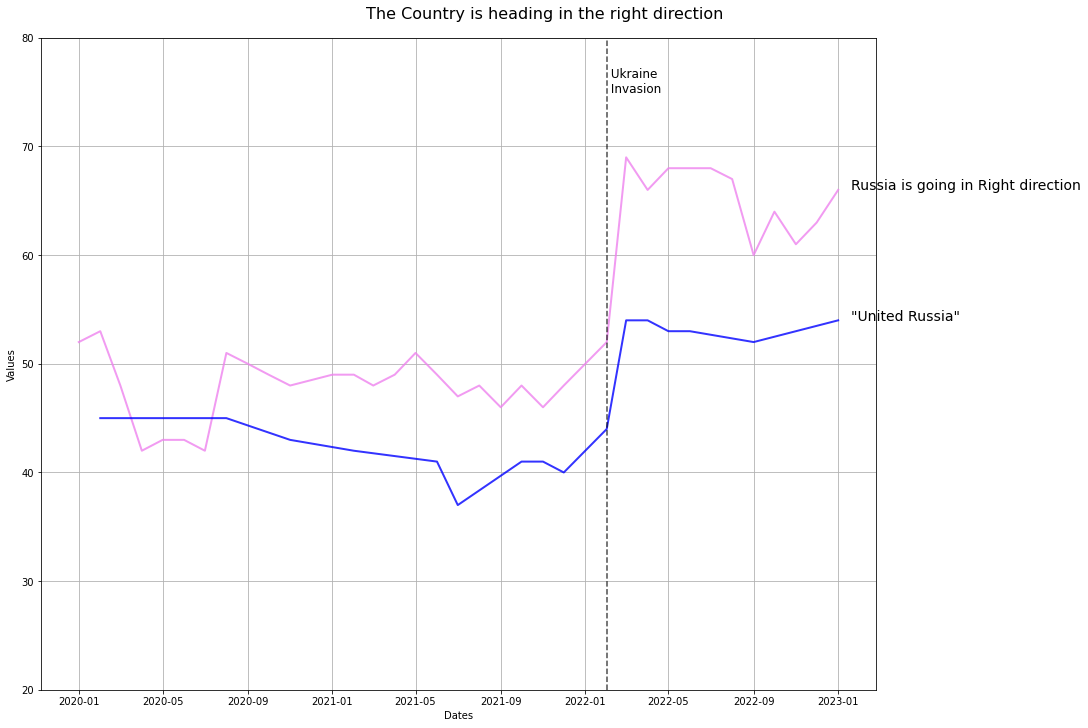

In [ ]:
import matplotlib.pyplot as plt



fig, ax = plt.subplots(figsize=(15, 10), constrained_layout=True,)


plt.ylim(20,80)


ax.plot(asses_direction_2020.Date,asses_direction_2020['Right direction'], linewidth=2,alpha=0.8, color='violet' )
ax.plot(short_part_cl['Date'],short_part_cl['All-Russian political party "United Russia"'], linewidth=2,alpha=0.8, color='blue' )



plt.axvline(pd.Timestamp('2022-02'),color='black',linestyle='dashed', alpha=.7)
plt.text(x=pd.Timestamp('2022-02'), y=75, s=' Ukraine\n Invasion', color='black', fontsize=12)

plt.text(x=pd.Timestamp('2023-01-20'), y=66, s='Russia is going in Right direction', color='black', fontsize = 14)
plt.text(x=pd.Timestamp('2023-01-20'), y=54, s='"United Russia"', color='black', fontsize = 14)

plt.xlabel('Dates')
plt.ylabel('Values')

# ax.legend(['Support for the goverment policies','United Russia, support'], loc='upper right')

plt.grid()
fig.suptitle('The Country is heading in the right direction', fontsize=16)
plt.savefig('/content/drive/MyDrive/movie_russia/January/party_russia_moving_right.jpg', bbox_inches='tight')

results for :

According to an open question (, respondents were asked to name several politicians whom they most trust ) in January, the level of trust in key political figures remained almost at the same level, December: 43% trust Vladimir Putin% ( in December – 44% ), Mikhail Mishustin – 17% ( in December – 18% ), Sergey Lavrov – 15% ( in December – 14% ( in December – 13% ).

source :https://www.levada.ru/2023/02/01/odobrenie-institutov-rejtingi-politikov-i-partij-yanvar-2023-goda/

In [ ]:
column_politicians = df_list[-3][0].to_list()
trusted_politic =df_list[-3].T.iloc[1:, :]

In [ ]:
column_politicians[0] = 'Date'
column_politicians[:4]

['Date', 'ПУТИН', 'МИШУСТИН', 'ЛАВРОВ']

In [ ]:
selec_ploticians = ['Date','ПУТИН',
 'МИШУСТИН',
 'ЛАВРОВ',
 'ШОЙГУ',
 'ВОЛОДИН',
 'ЗЮГАНОВ',
 'МЕДВЕДЕВ',
 'СОБЯНИН',
 'МИРОНОВ',
 'МАТВИЕНКО',
 'ГЛАДКОВ',
 'ПЕСКОВ', 
 'Никому',]

In [ ]:
politicians_names =pd.read_csv('/content/drive/MyDrive/movie_russia/January/politicians.txt')

In [ ]:
politicians_names.columns = politicians_names.columns.str.strip()

In [ ]:
data_en = politicians_names['Name_en'].to_list()

In [ ]:
data_en

['Putin',
 'Mishustin',
 'Lavrov',
 'Shoigu',
 'Volodin',
 'Zyuganov',
 'Medvedev',
 'Sobyanin',
 'Mironov',
 'Matviyenko',
 'Gladkov',
 'Peskov']

In [ ]:
data_en.insert(0, 'Date')
data_en.append('Nobady')

In [ ]:
trusted_politic.columns = column_politicians
trusted_politic_selec = trusted_politic[selec_ploticians]
trusted_politic_selec.columns = data_en
trusted_politic_selec.head()

,Date,Putin,Mishustin,Lavrov,Shoigu,Volodin,Zyuganov,Medvedev,Sobyanin,Mironov,Matviyenko,Gladkov,Peskov,Nobady
1,янв.20,35,3,17,19,1,7,5,2,3,2,NaN,1,22
2,апр.20,28,13,11,13,1,6,3,4,1,1,NaN,1,12
3,май.20,25,11,9,14,1,4,2,4,1,2,NaN,1,16
4,июн.20,26,14,8,12,1,5,3,3,2,2,NaN,1,16
5,июл.20,23,10,6,10,1,4,2,1,1,1,NaN,1,17


In [ ]:
trusted_politic_selec['month']=trusted_politic_selec['Date'].str[:3]
trusted_politic_selec['year']='20'+ trusted_politic_selec['Date'].str[-2:]

<ipython-input-169-a1295497298c>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  trusted_politic_selec['month']=trusted_politic_selec['Date'].str[:3]
<ipython-input-169-a1295497298c>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  trusted_politic_selec['year']='20'+ trusted_politic_selec['Date'].str[-2:]


In [ ]:
listo2=[]
for item in trusted_politic_selec['month']:
  listo2.append(month_translate.get(item))

trusted_politic_selec['month_en']=listo2


<ipython-input-170-7441346ae07e>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  trusted_politic_selec['month_en']=listo2


In [ ]:
trusted_politic_selec.insert(0, 'Date_en', (pd.to_datetime((trusted_politic_selec['month_en']+'-'+trusted_politic_selec['year']))))
trusted_politic_selec.drop(columns=['Date','month' ,	'year' ,	'month_en'], inplace=True)

trusted_politic_selec.head()

/usr/local/lib/python3.8/dist-packages/pandas/core/frame.py:4906: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(


,Date_en,Putin,Mishustin,Lavrov,Shoigu,Volodin,Zyuganov,Medvedev,Sobyanin,Mironov,Matviyenko,Gladkov,Peskov,Nobady
1,2020-01-01,35,3,17,19,1,7,5,2,3,2,NaN,1,22
2,2020-04-01,28,13,11,13,1,6,3,4,1,1,NaN,1,12
3,2020-05-01,25,11,9,14,1,4,2,4,1,2,NaN,1,16
4,2020-06-01,26,14,8,12,1,5,3,3,2,2,NaN,1,16
5,2020-07-01,23,10,6,10,1,4,2,1,1,1,NaN,1,17


In [ ]:
trusted_politic_selec.to_csv('/content/drive/MyDrive/RUSSdata/Levada/OverallRes2022_23ADDonIndicators/Trusted_politicians.csv', index=False)

In [ ]:
import pandas as pd
selected_pol = pd.read_csv('/content/drive/MyDrive/RUSSdata/Levada/OverallRes2022_23ADDonIndicators/Trusted_politicians.csv')

slected_cols = ['Date_en','Putin','Lavrov','Shoigu','Medvedev']
selected_politicians = selected_pol[slected_cols]
selected_politicians=selected_politicians.set_index('Date_en')
selected_politicians= selected_politicians.astype(int)
selected_politicians.index =pd.to_datetime(selected_politicians.index)
selected_politicians.head()

,Putin,Lavrov,Shoigu,Medvedev
Date_en,,,,
2020-01-01,35,17,19,5
2020-04-01,28,11,13,3
2020-05-01,25,9,14,2
2020-06-01,26,8,12,3
2020-07-01,23,6,10,2


In [ ]:
president_short = approval_president[approval_president['date']>'2019-12']
president_short.set_index('date', inplace=True)

In [ ]:
approval_gov_short = approval_gov[approval_gov['date']>'2019-12']


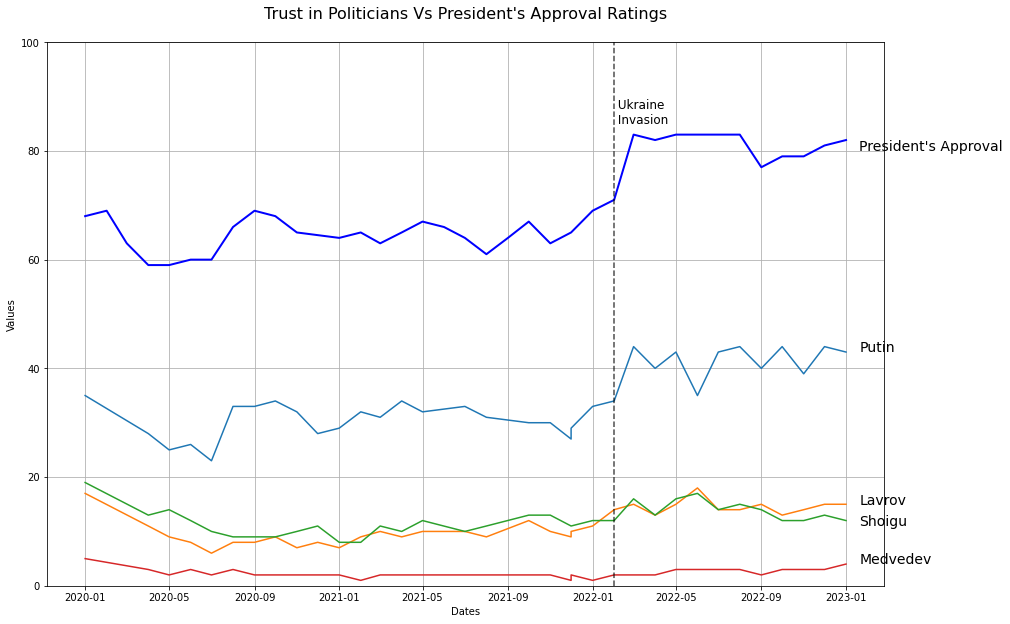

In [ ]:
import matplotlib.pyplot as plt


plt.figure(figsize=(15, 10))

plt.ylim(0, 100)

plt.plot(selected_politicians)
plt.plot(president_short, linewidth=2, color='blue')

plt.text(x=pd.Timestamp('2023-01-20'), y=80, s='President\'s Approval', color='black', fontsize = 14)
plt.text(x=pd.Timestamp('2023-01-20'), y=43, s='Putin', color='black', fontsize = 14)
plt.text(x=pd.Timestamp('2023-01-20'), y=15, s='Lavrov', color='black', fontsize = 14)
plt.text(x=pd.Timestamp('2023-01-20'), y=11, s='Shoigu', color='black', fontsize = 14)
plt.text(x=pd.Timestamp('2023-01-20'), y=4, s='Medvedev', color='black', fontsize = 14)

plt.axvline(pd.Timestamp('2022-02'),color='black',linestyle='dashed', alpha=.7)
plt.text(x=pd.Timestamp('2022-02'), y=85, s=' Ukraine\n Invasion', color='black', fontsize=12)

plt.grid()

plt.xlabel('Dates')
plt.ylabel('Values')

plt.title('Trust in Politicians Vs President\'s Approval Ratings\n', fontsize=16)
plt.savefig('/content/drive/MyDrive/movie_russia/January/politicians_trust.jpg', bbox_inches='tight')

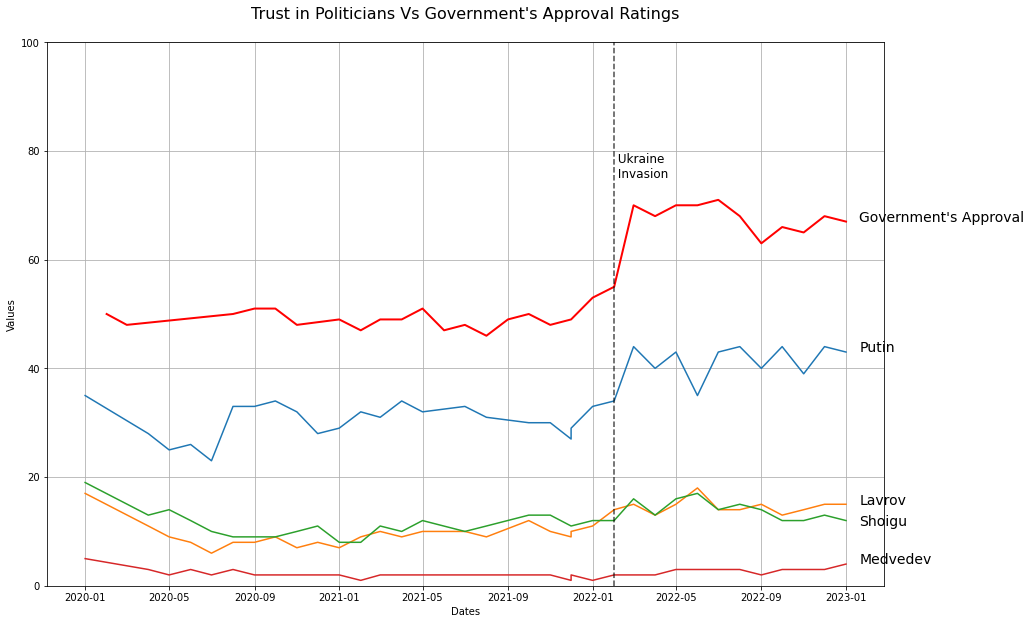

In [ ]:
import matplotlib.pyplot as plt


plt.figure(figsize=(15, 10))

plt.ylim(0, 100)

plt.plot(selected_politicians)
plt.plot(approval_gov_short, linewidth=2, color='red')


plt.text(x=pd.Timestamp('2023-01-20'), y=67, s='Government\'s Approval', color='black', fontsize = 14)
plt.text(x=pd.Timestamp('2023-01-20'), y=43, s='Putin', color='black', fontsize = 14)
plt.text(x=pd.Timestamp('2023-01-20'), y=15, s='Lavrov', color='black', fontsize = 14)
plt.text(x=pd.Timestamp('2023-01-20'), y=11, s='Shoigu', color='black', fontsize = 14)
plt.text(x=pd.Timestamp('2023-01-20'), y=4, s='Medvedev', color='black', fontsize = 14)

plt.axvline(pd.Timestamp('2022-02'),color='black',linestyle='dashed', alpha=.7)
plt.text(x=pd.Timestamp('2022-02'), y=75, s=' Ukraine\n Invasion', color='black', fontsize=12)

plt.grid()

plt.xlabel('Dates')
plt.ylabel('Values')

plt.title('Trust in Politicians Vs Government\'s Approval Ratings\n', fontsize=16)
plt.savefig('/content/drive/MyDrive/movie_russia/January/government_vs_politicians.jpg', bbox_inches='tight')

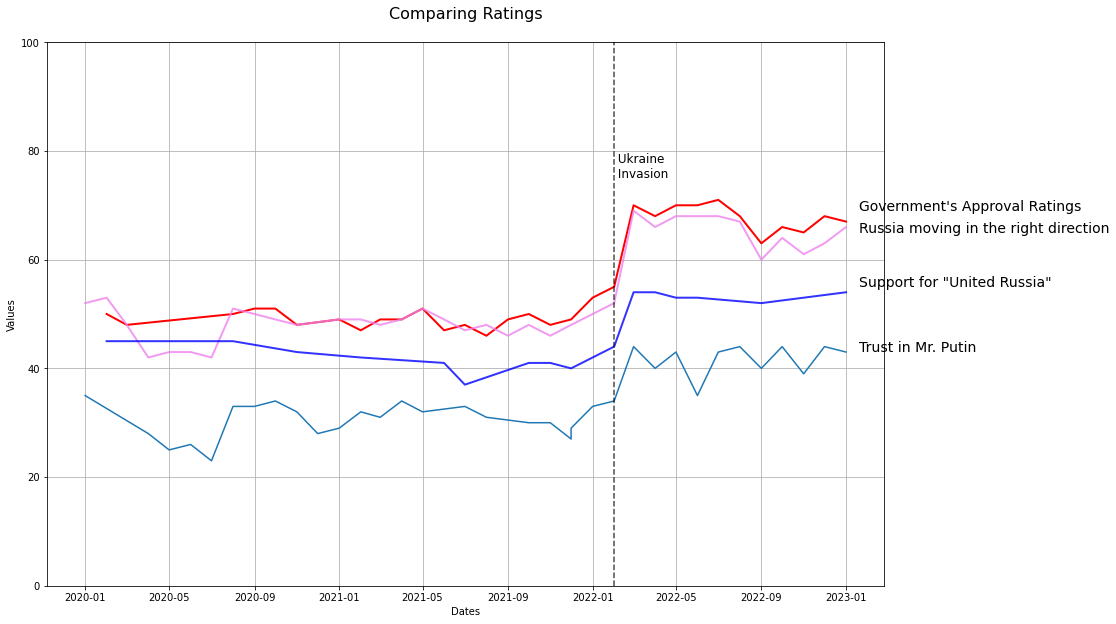

In [ ]:
import matplotlib.pyplot as plt


plt.figure(figsize=(15, 10))

plt.ylim(0, 100)

plt.plot(selected_politicians.index, selected_politicians['Putin'])
plt.plot(approval_gov_short, linewidth=2, color='red')

plt.plot(asses_direction_2020.Date,asses_direction_2020['Right direction'], linewidth=2,alpha=0.8, color='violet' )
plt.plot(short_part_cl['Date'],short_part_cl['All-Russian political party "United Russia"'], linewidth=2,alpha=0.8, color='blue' )

plt.text(x=pd.Timestamp('2023-01-20'), y=69, s='Government\'s Approval Ratings', color='black', fontsize = 14)
plt.text(x=pd.Timestamp('2023-01-20'), y=43, s='Trust in Mr. Putin', color='black', fontsize = 14)
plt.text(x=pd.Timestamp('2023-01-20'), y=65, s='Russia moving in the right direction', color='black', fontsize = 14)
plt.text(x=pd.Timestamp('2023-01-20'), y=55, s='Support for "United Russia"', color='black', fontsize = 14)

plt.axvline(pd.Timestamp('2022-02'),color='black',linestyle='dashed', alpha=.7)
plt.text(x=pd.Timestamp('2022-02'), y=75, s=' Ukraine\n Invasion', color='black', fontsize=12)

plt.grid()

plt.xlabel('Dates')
plt.ylabel('Values')

plt.title('Comparing Ratings\n', fontsize=16)
plt.savefig('/content/drive/MyDrive/movie_russia/January/gov_putin_russia_united.jpg', bbox_inches='tight')

In [ ]:
religion = pd.read_csv('/content/drive/MyDrive/movie_russia/religion - Sheet1.csv')

In [ ]:
religion.tail()

,Unnamed: 0,Year,Orthodoxy,Atheist
14,фев,2017,0.79,0.05
15,июн,2018,0.75,0.05
16,июл,2019,0.77,0.06
17,янв,2020,0.65,0.07
18,anp,2022,0.71,0.04


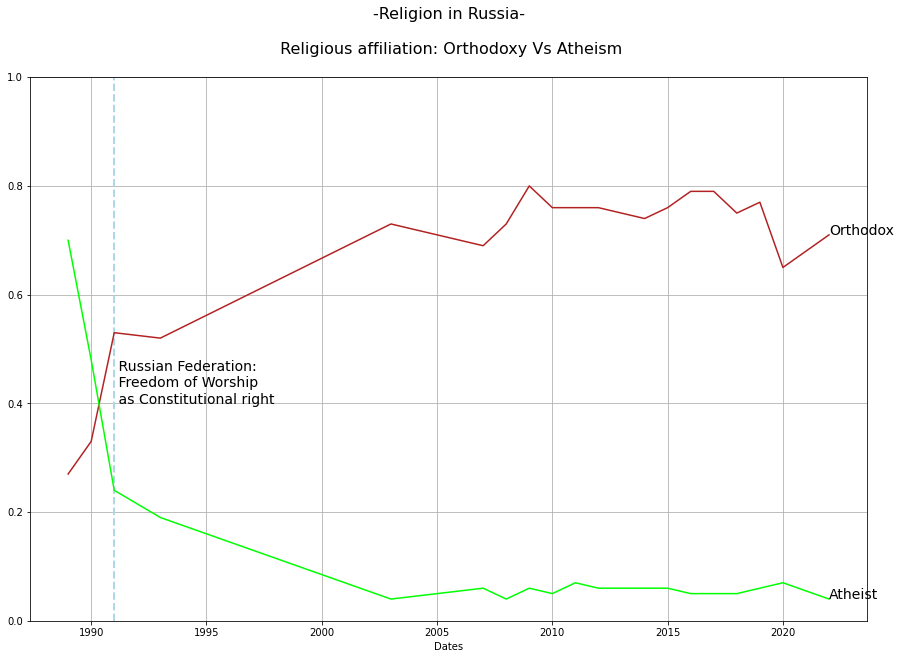

In [ ]:
plt.figure(figsize=(15, 10))

plt.ylim(0, 1)


plt.vlines(1991, 0, 1, color="lightblue", linestyle = 'dashed', linewidth=2)
plt.text(x=1991, y=0.4, s=' Russian Federation: \n Freedom of Worship \n as Constitutional right', color='black', fontsize =14)

plt.plot(religion['Year'], religion['Orthodoxy'], color= 'firebrick')
plt.plot(religion['Year'], religion['Atheist'], color ='lime')

plt.text(x=2022, y=0.71, s='Orthodox', color='black', fontsize = 14)
plt.text(x=2022, y=0.04, s='Atheist', color='black', fontsize = 14)

plt.xlabel('Dates')

plt.title('Orthodoxy')
plt.grid()
plt.title('-Religion in Russia-\n\n Religious affiliation: Orthodoxy Vs Atheism\n', fontsize =16)
plt.savefig('/content/drive/MyDrive/movie_russia/January/religion.jpg', bbox_inches='tight')